In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
print('''
Information on Reinforcement Robot:
    Hoop (GOAL) height(>0) and distance(>5) from robot are entered by the user
    Robot is positioned at (5,0)
    Hoop has a radius of 1 unit
    The robot arm link is 5 units in length
    Angle of end effector at time of projection is constant 90 degrees
    Variables of motion that will be changed based on Reinforcement : 
        Angle of base joint at time of projection(>90,<180)
        Speed of projection(>0)
''')


Information on Reinforcement Robot:
    Hoop (GOAL) height(>0) and distance(>5) from robot are entered by the user
    Robot is positioned at (5,0)
    Hoop has a radius of 1 unit
    The robot arm link is 5 units in length
    Angle of end effector at time of projection is constant 90 degrees
    Variables of motion that will be changed based on Reinforcement : 
        Angle of base joint at time of projection(>90,<180)
        Speed of projection(>0)



In [3]:
base_x=5
base_y=0
hoop_x=int(input('Enter x coordinate(>5) of GOAL hoop : '))
hoop_y=int(input('Enter y coordinate(>0) of GOAL hoop : '))
link=5

base_theta=135 #degrees
speed=10 #units/s

Enter x coordinate(>5) of GOAL hoop : 17
Enter y coordinate(>0) of GOAL hoop : 8


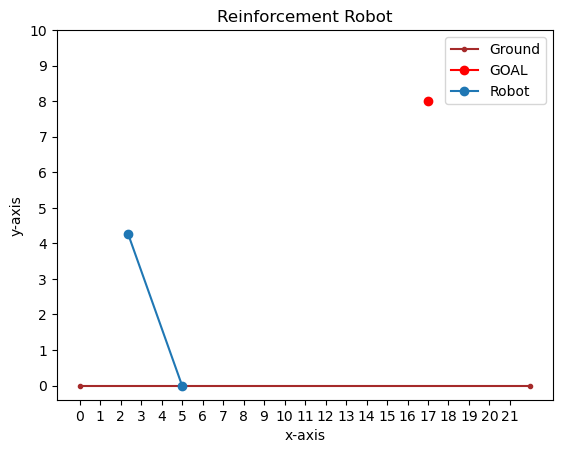

In [4]:
X=base_x-link*math.cos(base_theta-90)
Y=link*math.sin(base_theta-90)

plt.plot([0,hoop_x+5],[0,0],label='Ground',marker='.',color='brown')
plt.plot([hoop_x],[hoop_y],label='GOAL',marker='o',color='red')
plt.plot([base_x,X],[base_y,Y],label='Robot',marker='o',linestyle='-')
plt.title('Reinforcement Robot')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.xticks([x for x in range(0,hoop_x+5)])
plt.yticks([x for x in range(11)])
plt.legend()

plt.show()

In [5]:
def cos(x):
    return round(math.cos(math.radians(x)),5)
def sin(x):
    return round(math.sin(math.radians(x)),5)

In [6]:
def projectile_plot(base_theta,speed,plot):
    
    X=base_x-link*cos(180-base_theta)
    Y=link*sin(180-base_theta)

    theta=base_theta-90

    projectile_x=[X]
    projectile_y=[Y]
    t=0
    y=Y
    hit=0
    while(y>=0):
        x=X+(speed*cos(theta)*t)
        y=Y+(speed*sin(theta)*t)-((1/2)*9.8*t**2)
        
        if(x<hoop_x+0.5 and x>hoop_x-0.5 and hit==0 and y<hoop_y+0.5 and y>hoop_y):
            hit=1
        
        projectile_x.append(x)
        projectile_y.append(y)
        t+=0.01
    
    if(plot):
        plt.plot([0,hoop_x+5],[0,0],label='Ground',marker='.',color='brown')
        plt.plot([hoop_x],[hoop_y],label='GOAL',marker='o',color='red')
        plt.plot([base_x,X],[base_y,Y],label='Robot',marker='o',linestyle='-')
        plt.plot(projectile_x,projectile_y,label='Projectile Motion',marker='.',linestyle='-')

        plt.title('Reinforcement Robot')
        plt.xlabel('x-axis')
        plt.ylabel('y-axis')
        plt.xticks([x for x in range(0,16)])
        plt.yticks([x for x in range(11)])
        plt.legend()
        plt.show()
    
    return hit

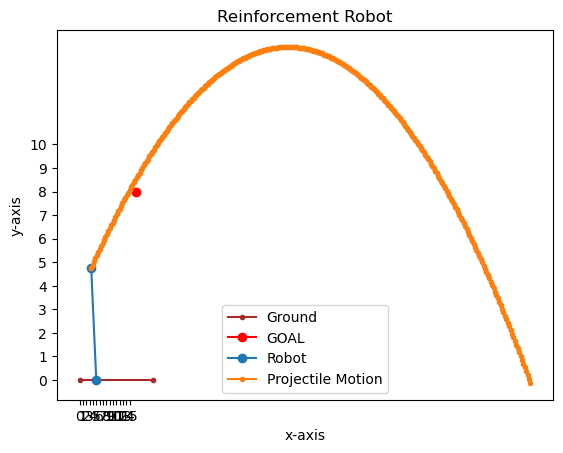

Iterations : 7
Theta : 107.67224693492543
Speed : 44.664654568897376


In [7]:
# Initialize theta and speed within the constraints
theta = random.uniform(90, 180)
speed = random.uniform(1,50)
hit=0
learning_rate = 0.01
iterations = 0
max_iterations = 10000
n=0
while hit != 1 and iterations < max_iterations:
    # Simulate changing theta and speed
    theta += random.uniform(-10, 10)
    speed += random.uniform(-0.1, 0.1)
    
    # Keep theta and speed within constraints
    theta = max(min(theta, 180), 90)
    speed = max(speed, 0)
    n+=1
    hit=projectile_plot(theta,speed,0)
hit=projectile_plot(theta,speed,1)
print('Iterations :',n)
print('Theta :',theta)
print('Speed :',speed)